In [1]:
#Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [2]:
#Loading the dataset
train = pd.read_csv('creditcard.csv', on_bad_lines='skip')

In [3]:
#Checking the shape of the Dataset
train.shape

(284807, 31)

In [4]:
#Have a look at the data, head function of Pandas will show first n rows of dataset
train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#dtype function of Pandas gives us the datatypes of the columns
train.dtypes

#There are no object datatypes colums in train dataset

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [6]:
#Check out duplicate values in Dataset
duplicate = train[train.duplicated()]

print("Duplicated Rows : ")
print(duplicate)

#we found no duplicate rows

Duplicated Rows : 
            Time        V1        V2        V3        V4        V5        V6  \
33          26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
35          26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
113         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
114         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
115         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
...          ...       ...       ...       ...       ...       ...       ...   
282987  171288.0  1.912550 -0.455240 -1.750654  0.454324  2.089130  4.160019   
283483  171627.0 -1.464380  1.368119  0.815992 -0.601282 -0.689115 -0.487154   
283485  171627.0 -1.457978  1.378203  0.811515 -0.603760 -0.711883 -0.471672   
284191  172233.0 -2.667936  3.160505 -3.355984  1.007845 -0.377397 -0.109730   
284193  172233.0 -2.691642  3.123168 -3.339407  1.017018 -0.293095 -0.167054   

              V7    

In [7]:
#Checking null values
train.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
#Exploratory Data Analysis

#Checking transactions count based on class
pd.value_counts(train['Class'])

C:\Users\polag\AppData\Local\Temp\ipykernel_16704\651100532.py:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(train['Class'])


Class
0    284315
1       492
Name: count, dtype: int64

In [9]:
#Bar Chart

#Bar graph Class vs Transactions
#sns.countplot(train['Class'])

<Axes: >

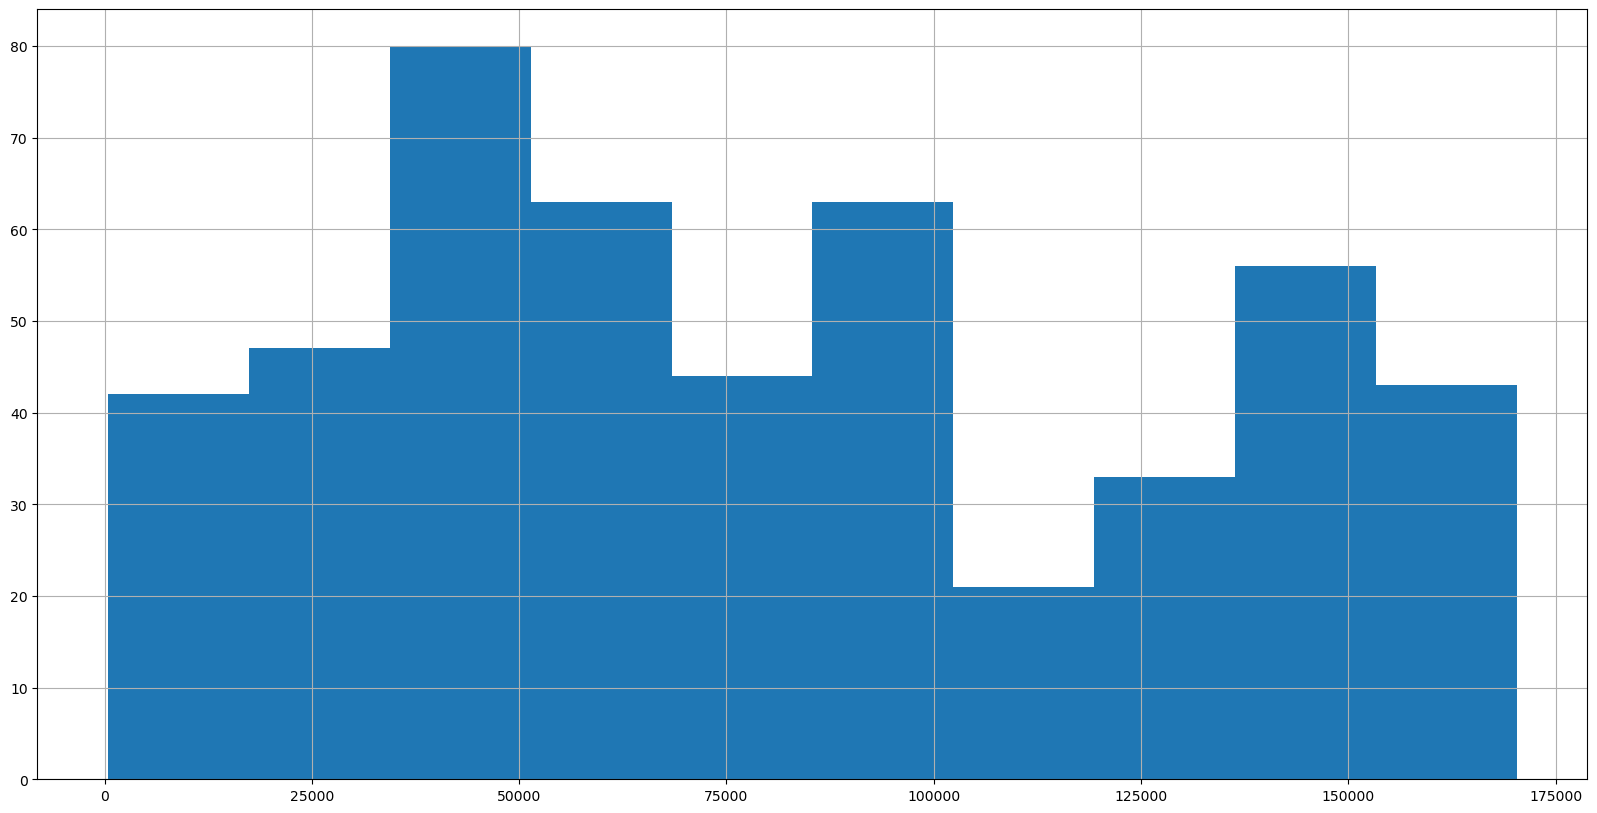

In [10]:
fig = plt.figure(figsize = (20,10))
ax = fig.gca()
train[train.Class==1].Time.hist(ax=ax)

In [11]:
#First filter fraud transactions with Class==1
print("Transactions that have marked as fraud",train[train.Class==1].shape[0])

#Filter non fraud transactions with Class==0
print("Transactions that have marked as fraud",train[train.Class==0].shape[0])

Transactions that have marked as fraud 492
Transactions that have marked as fraud 284315


<Axes: >

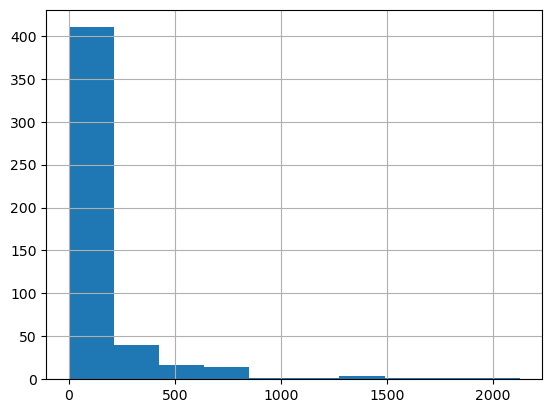

In [12]:
train[train.Class==1]['Amount'].hist()

In [13]:
#Basic feature engineering

#Since there is no categorical data in train data set we can proceed with whole dataset

X=train.iloc[:,:-1]
y=train[['Class']]

In [14]:
X.info,y.info

(<bound method DataFrame.info of             Time         V1         V2        V3        V4        V5  \
 0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
 1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
 2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
 3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
 4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
 ...          ...        ...        ...       ...       ...       ...   
 284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
 284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
 284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
 284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
 284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   
 
               V6        V7        V8        V9  ...       V20       V21  \
 0       0.462

In [15]:
#convert imbalanced data to balanced data
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
x_res , y_res = ros.fit_resample(X,y)

In [16]:
len(train[train['Class']==0]) #valid transaction

284315

In [17]:
len(train[train['Class']==1]) #fradulent transactions

492

In [18]:
#Let's do train/test split 80-20
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(x_res , y_res , test_size=0.3 , random_state=42)

In [19]:
#Shape of both Train and test datasets X
X_train.shape,X_test.shape

((398041, 30), (170589, 30))

In [20]:
#Shape of both Train and test datasets y
y_train.shape,y_test.shape

((398041, 1), (170589, 1))

In [21]:
#Random Forest

#import randomforestclassifier from scikit learn, since we are silving a classification problem
from sklearn.ensemble import RandomForestClassifier
#Classification report gives us the results of our model
from sklearn.metrics import classification_report

In [22]:
#classifier=RandomForestClassifier(n_estimators = 641 , random_state=0)

classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0, n_jobs=-1)
#classifier.fit(X_train , y_train)
classifier.fit(X_train, y_train.values.ravel())
pred=classifier.predict(X_test)

#print(classification_report(y_test.values,pred))

In [23]:
from sklearn.metrics import precision_score
precision_score(y_test,pred)

0.9994786915157045

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     85149
           1       1.00      0.99      0.99     85440

    accuracy                           0.99    170589
   macro avg       0.99      0.99      0.99    170589
weighted avg       0.99      0.99      0.99    170589



In [25]:
#Thank you!!

In [26]:
#from sklearn.metrics import precision_score
#precision_score(y_test , pred)